In [ ]:
import pandas as pd

df = pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')
print("Shape:", df.shape)
print(df.head())

Shape: (350, 11)
   Customer ID  Gender  Age           City Membership Type  Total Spend  \
0          101  Female   29       New York            Gold      1120.20   
1          102    Male   34    Los Angeles          Silver       780.50   
2          103  Female   43        Chicago          Bronze       510.75   
3          104    Male   30  San Francisco            Gold      1480.30   
4          105    Male   27          Miami          Silver       720.40   

   Items Purchased  Average Rating  Discount Applied  \
0               14             4.6              True   
1               11             4.1             False   
2                9             3.4              True   
3               19             4.7             False   
4               13             4.0              True   

   Days Since Last Purchase Satisfaction Level  
0                        25          Satisfied  
1                        18            Neutral  
2                        42        Unsatisfied  

In [ ]:
import pandas as pd

df = pd.read_csv('/content/E-commerce Customer Behavior - Sheet1.csv')
print("Shape after loading:", df.shape)

# Feature selection
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating']
df = df[features]
print("Shape after feature selection:", df.shape)

# Imputation
df['Age'].fillna(df['Age'].mean(), inplace=True)
print("Shape after imputation:", df.shape)

# Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
print("Shape before PCA:", df.shape) #Shape is not changed by scaling

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_features)
print("Shape after PCA:", principalComponents.shape)

Shape after loading: (350, 11)
Shape after feature selection: (350, 4)
Shape after imputation: (350, 4)
Shape before PCA: (350, 4)
Shape after PCA: (350, 2)


<ipython-input-81-5cb6d4d7e20a>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [ ]:
import csv
import pandas as pd

try:
    with open('/content/E-commerce Customer Behavior - Sheet1.csv', 'r') as csvfile:
        reader = csv.reader(csvfile)
        header = next(reader)  # Get the header row
        data = list(reader)      # Read all the data rows

    df = pd.DataFrame(data, columns=header)
    print(df.head())
    print(df.info())
    print(df.describe())

except FileNotFoundError:
    print("Error: The file was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

  Customer ID  Gender Age           City Membership Type Total Spend  \
0         101  Female  29       New York            Gold      1120.2   
1         102    Male  34    Los Angeles          Silver       780.5   
2         103  Female  43        Chicago          Bronze      510.75   
3         104    Male  30  San Francisco            Gold      1480.3   
4         105    Male  27          Miami          Silver       720.4   

  Items Purchased Average Rating Discount Applied Days Since Last Purchase  \
0              14            4.6             TRUE                       25   
1              11            4.1            FALSE                       18   
2               9            3.4             TRUE                       42   
3              19            4.7            FALSE                       12   
4              13              4             TRUE                       55   

  Satisfaction Level  
0          Satisfied  
1            Neutral  
2        Unsatisfied  
3     

In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df' and you've already performed the data type conversions
missing_values = df.isnull().sum()
print(missing_values)

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          0
dtype: int64


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'
if df['Age'].isnull().any():  # Check if there are any missing values in 'Age'
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    print("Missing values in 'Age' imputed with the mean.")
else:
    print("'Age' column has no missing values.")

'Age' column has no missing values.


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Check data types before qcut
print(f"Data type of 'Days Since Last Purchase': {df['Days Since Last Purchase'].dtype}")
print(f"Data type of 'Items Purchased': {df['Items Purchased'].dtype}")
print(f"Data type of 'Total Spend': {df['Total Spend'].dtype}")

# Convert to numeric if necessary
df['Days Since Last Purchase'] = pd.to_numeric(df['Days Since Last Purchase'], errors='coerce')
df['Items Purchased'] = pd.to_numeric(df['Items Purchased'], errors='coerce')
df['Total Spend'] = pd.to_numeric(df['Total Spend'], errors='coerce')

# Verify data types after conversion
print(f"Data type of 'Days Since Last Purchase' after conversion: {df['Days Since Last Purchase'].dtype}")
print(f"Data type of 'Items Purchased' after conversion: {df['Items Purchased'].dtype}")
print(f"Data type of 'Total Spend' after conversion: {df['Total Spend'].dtype}")


# Create RFM quantiles (e.g., quartiles)
df['R'] = pd.qcut(df['Days Since Last Purchase'], q=4, labels=False,  duplicates='drop')  # Lower values are better
df['F'] = pd.qcut(df['Items Purchased'], q=4, labels=False, duplicates='drop')  # Higher values are better
df['M'] = pd.qcut(df['Total Spend'], q=4, labels=False, duplicates='drop')  # Higher values are better

# Combine RFM scores (optional)
df['RFM_Score'] = df['R'].astype(str) + df['F'].astype(str) + df['M'].astype(str)

print(df[['Days Since Last Purchase', 'Items Purchased', 'Total Spend', 'R', 'F', 'M', 'RFM_Score']].head())

Data type of 'Days Since Last Purchase': object
Data type of 'Items Purchased': object
Data type of 'Total Spend': object
Data type of 'Days Since Last Purchase' after conversion: int64
Data type of 'Items Purchased' after conversion: int64
Data type of 'Total Spend' after conversion: float64
   Days Since Last Purchase  Items Purchased  Total Spend  R  F  M RFM_Score
0                        25               14      1120.20  2  2  2       222
1                        18               11       780.50  1  1  2       112
2                        42                9       510.75  3  0  1       301
3                        12               19      1480.30  0  3  3       033
4                        55               13       720.40  3  2  1       321


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# Create RFM quantiles (e.g., quartiles)
df['R'] = pd.qcut(df['Days Since Last Purchase'], q=4, labels=False)  # Lower values are better
df['F'] = pd.qcut(df['Items Purchased'], q=4, labels=False,  duplicates='drop')  # Higher values are better
df['M'] = pd.qcut(df['Total Spend'], q=4, labels=False, duplicates='drop')  # Higher values are better

# Combine RFM scores (optional)
df['RFM_Score'] = df['R'].astype(str) + df['F'].astype(str) + df['M'].astype(str)

print(df[['Days Since Last Purchase', 'Items Purchased', 'Total Spend', 'R', 'F', 'M', 'RFM_Score']].head())

   Days Since Last Purchase  Items Purchased  Total Spend  R  F  M RFM_Score
0                        25               14      1120.20  2  2  2       222
1                        18               11       780.50  1  1  2       112
2                        42                9       510.75  3  0  1       301
3                        12               19      1480.30  0  3  3       033
4                        55               13       720.40  3  2  1       321


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# ... (Previous code for RFM and CLTV) ...

# Targeted check and conversion before Spend_Per_Item
print(f"Data type of 'Total Spend' before Spend_Per_Item: {df['Total Spend'].dtype}")
print(f"Data type of 'Items Purchased' before Spend_Per_Item: {df['Items Purchased'].dtype}")

# Convert to numeric if necessary, right before the calculation
df['Total Spend'] = pd.to_numeric(df['Total Spend'], errors='coerce')
df['Items Purchased'] = pd.to_numeric(df['Items Purchased'], errors='coerce')

print(f"Data type of 'Total Spend' AFTER conversion: {df['Total Spend'].dtype}")
print(f"Data type of 'Items Purchased' AFTER conversion: {df['Items Purchased'].dtype}")


# Behavioral features
df['Spend_Per_Item'] = df['Total Spend'] / df['Items Purchased']
print(df['Spend_Per_Item'].head())

Data type of 'Total Spend' before Spend_Per_Item: float64
Data type of 'Items Purchased' before Spend_Per_Item: int64
Data type of 'Total Spend' AFTER conversion: float64
Data type of 'Items Purchased' AFTER conversion: int64
0    80.014286
1    70.954545
2    56.750000
3    77.910526
4    55.415385
Name: Spend_Per_Item, dtype: float64


In [ ]:
import pandas as pd

# Assuming your DataFrame is named 'df'

# ... (Previous code for RFM) ...

# Targeted check and conversion before CLTV calculation
print(f"Data type of 'Average Rating' before CLTV: {df['Average Rating'].dtype}")
print(f"Data type of 'Total Spend' before CLTV: {df['Total Spend'].dtype}")
print(f"Data type of 'Items Purchased' before CLTV: {df['Items Purchased'].dtype}")

# Convert to numeric if necessary, right before the calculation
df['Average Rating'] = pd.to_numeric(df['Average Rating'], errors='coerce')
df['Total Spend'] = pd.to_numeric(df['Total Spend'], errors='coerce')
df['Items Purchased'] = pd.to_numeric(df['Items Purchased'], errors='coerce')

print(f"Data type of 'Average Rating' AFTER conversion: {df['Average Rating'].dtype}")
print(f"Data type of 'Total Spend' AFTER conversion: {df['Total Spend'].dtype}")
print(f"Data type of 'Items Purchased' AFTER conversion: {df['Items Purchased'].dtype}")


# Simplified CLTV calculation (example)
df['CLTV'] = (df['Average Rating'] / 5) * df['Total Spend'] * df['Items Purchased']
print(df['CLTV'].head())

# ... (Rest of your code) ...

Data type of 'Average Rating' before CLTV: object
Data type of 'Total Spend' before CLTV: float64
Data type of 'Items Purchased' before CLTV: int64
Data type of 'Average Rating' AFTER conversion: float64
Data type of 'Total Spend' AFTER conversion: float64
Data type of 'Items Purchased' AFTER conversion: int64
0    14428.176
1     7040.110
2     3125.790
3    26438.158
4     7492.160
Name: CLTV, dtype: float64


In [ ]:
# Behavioral features
df['Spend_Per_Item'] = df['Total Spend'] / df['Items Purchased']
print(df['Spend_Per_Item'].head())

0    80.014286
1    70.954545
2    56.750000
3    77.910526
4    55.415385
Name: Spend_Per_Item, dtype: float64


In [ ]:
# Convert columns to numeric types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Total Spend'] = pd.to_numeric(df['Total Spend'], errors='coerce')
df['Average Rating'] = pd.to_numeric(df['Average Rating'], errors='coerce')

# Check the data types after conversion
print(df[['Age', 'Total Spend', 'Average Rating']].dtypes)

Age                 int64
Total Spend       float64
Average Rating    float64
dtype: object


In [ ]:
import pandas as pd

# Convert columns to numeric types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Total Spend'] = pd.to_numeric(df['Total Spend'], errors='coerce')
df['Average Rating'] = pd.to_numeric(df['Average Rating'], errors='coerce')

# Check the data types after conversion
print(df[['Age', 'Total Spend', 'Average Rating']].dtypes)

# Interaction features
df['Age_Spend'] = df['Age'] * df['Total Spend']
df['Rating_Spend'] = df['Average Rating'] * df['Total Spend']

# Print the relevant columns to confirm creation
print(df[['Age', 'Total Spend', 'Age_Spend', 'Average Rating', 'Rating_Spend']].head())

Age                 int64
Total Spend       float64
Average Rating    float64
dtype: object
   Age  Total Spend  Age_Spend  Average Rating  Rating_Spend
0   29      1120.20   32485.80             4.6       5152.92
1   34       780.50   26537.00             4.1       3200.05
2   43       510.75   21962.25             3.4       1736.55
3   30      1480.30   44409.00             4.7       6957.41
4   27       720.40   19450.80             4.0       2881.60


In [ ]:
print(df.columns)

Index(['Customer ID', 'Gender', 'Age', 'City', 'Membership Type',
       'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
       'Days Since Last Purchase', 'Satisfaction Level', 'R', 'F', 'M',
       'RFM_Score', 'Spend_Per_Item', 'CLTV', 'Age_Spend', 'Rating_Spend'],
      dtype='object')


In [ ]:
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
            'Days Since Last Purchase', 'Satisfaction Level', 'R', 'F', 'M', 'CLTV',
            'Age_Spend', 'Rating_Spend', 'Spend_Per_Item']

In [ ]:
import pandas as pd

features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating', 'Discount Applied',
            'Days Since Last Purchase', 'Satisfaction Level', 'R', 'F', 'M', 'CLTV',
            'Age_Spend', 'Rating_Spend', 'Spend_Per_Item']

# Iterate through each column in the 'features' list
for col in features:
    # Check if the column contains the string "TRUE"
    if (df[col] == "TRUE").any():
        print(f"Column '{col}' contains the string 'TRUE'")
    if (df[col] == "FALSE").any():
        print(f"Column '{col}' contains the string 'FALSE'")

Column 'Discount Applied' contains the string 'TRUE'
Column 'Discount Applied' contains the string 'FALSE'


In [ ]:
import pandas as pd

# Convert 'Discount Applied' to numerical (1 for TRUE, 0 for FALSE)
df['Discount Applied'] = df['Discount Applied'].map({'TRUE': 1, 'FALSE': 0})

# Verify the conversion
print(df['Discount Applied'].value_counts())
print(df['Discount Applied'].dtype)

Discount Applied
1    175
0    175
Name: count, dtype: int64
int64


In [ ]:
import pandas as pd

# Correct 'Discount Applied' conversion (True/False without quotes)
df['Discount Applied'] = df['Discount Applied'].map({True: 1, False: 0})

# Verify the conversion
print("Discount Applied value counts:")
print(df['Discount Applied'].value_counts(dropna=False))  # Show NaN values
print(df['Discount Applied'].dtype)

# Convert 'Satisfaction Level' to numerical values
df['Satisfaction Level'] = df['Satisfaction Level'].map({'Satisfied': 1, 'Neutral': 0.5, 'Unsatisfied': 0})

# Verify the conversion
print("\nSatisfaction Level value counts:")
print(df['Satisfaction Level'].value_counts(dropna=False))  # Show NaN values
print(df['Satisfaction Level'].dtype)

Discount Applied value counts:
Discount Applied
NaN    350
Name: count, dtype: int64
float64

Satisfaction Level value counts:
Satisfaction Level
1.0    125
0.0    116
0.5    107
NaN      2
Name: count, dtype: int64
float64


In [ ]:
print(df['Discount Applied'].unique())

[nan]


In [ ]:
import pandas as pd

# Updated features list (remove 'Discount Applied')
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
            'Days Since Last Purchase', 'Satisfaction Level', 'R', 'F', 'M', 'CLTV',
            'Age_Spend', 'Rating_Spend', 'Spend_Per_Item']

# Convert 'Satisfaction Level' to numerical values
df['Satisfaction Level'] = df['Satisfaction Level'].map({'Satisfied': 1, 'Neutral': 0.5, 'Unsatisfied': 0})

# Verify the conversion
print("\nSatisfaction Level value counts:")
print(df['Satisfaction Level'].value_counts(dropna=False))  # Show NaN values
print(df['Satisfaction Level'].dtype)

# Impute NaN values in 'Satisfaction Level' with the mean
df['Satisfaction Level'].fillna(df['Satisfaction Level'].mean(), inplace=True)

# Verify imputation
print("\nSatisfaction Level value counts after imputation:")
print(df['Satisfaction Level'].value_counts(dropna=False))


Satisfaction Level value counts:
Satisfaction Level
NaN    350
Name: count, dtype: int64
float64

Satisfaction Level value counts after imputation:
Satisfaction Level
NaN    350
Name: count, dtype: int64


<ipython-input-71-412ca4cb751a>:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Satisfaction Level'].fillna(df['Satisfaction Level'].mean(), inplace=True)


In [ ]:
import pandas as pd

# Updated features list (remove 'Discount Applied' and 'Satisfaction Level')
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
            'Days Since Last Purchase', 'R', 'F', 'M', 'CLTV',
            'Age_Spend', 'Rating_Spend', 'Spend_Per_Item']

Missing values before imputation:
Age                         0
Total Spend                 0
Items Purchased             0
Average Rating              0
Days Since Last Purchase    0
R                           0
F                           0
M                           0
CLTV                        0
Age_Spend                   0
Rating_Spend                0
Spend_Per_Item              0
dtype: int64

Missing values after imputation:
Age                         0
Total Spend                 0
Items Purchased             0
Average Rating              0
Days Since Last Purchase    0
R                           0
F                           0
M                           0
CLTV                        0
Age_Spend                   0
Rating_Spend                0
Spend_Per_Item              0
dtype: int64

Original number of features: 12
Number of features after PCA: 4

Number of features after t-SNE: 2

PCA DataFrame:
          0         1         2         3
0  2.100591  0.617028 -0.759

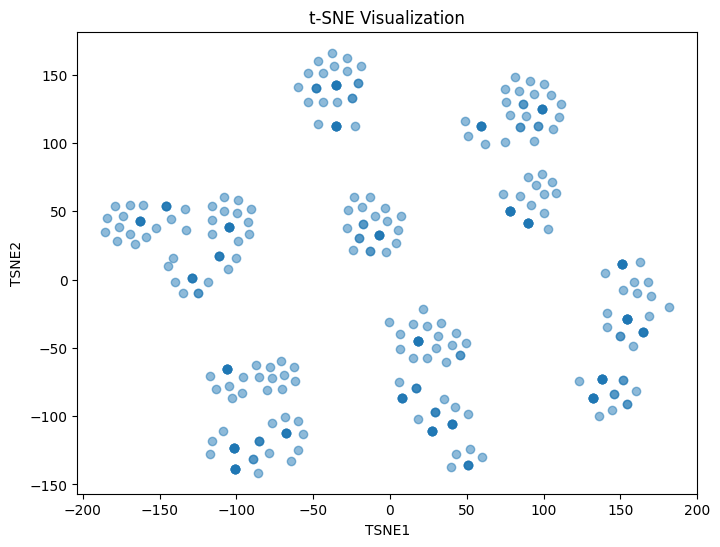

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# 1. Data Preparation: Select the features you want to use for dimensionality reduction
# **IMPORTANT: Double-check that these column names exactly match your DataFrame**
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
            'Days Since Last Purchase', 'R', 'F', 'M', 'CLTV',
            'Age_Spend', 'Rating_Spend', 'Spend_Per_Item']  # Replace with your CORRECT feature list


# 2. Handle missing values (if any) before scaling
# Check for missing values in the selected features
print("Missing values before imputation:")
print(df[features].isnull().sum())

# Impute missing values using the mean (replace with your preferred method)
for col in features:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after imputation:")
print(df[features].isnull().sum())

# 3. Scaling: Scale the data before applying PCA or t-SNE
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. PCA: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print("\nOriginal number of features:", X.shape[1])
print("Number of features after PCA:", X_pca.shape[1])

# 5. t-SNE: Apply t-SNE (optional, for visualization)
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_tsne = tsne.fit_transform(X_scaled)

print("\nNumber of features after t-SNE:", X_tsne.shape[1])

# Create DataFrames from the reduced data
pca_df = pd.DataFrame(data=X_pca)
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])  # Label columns for clarity

# Display the first few rows of the PCA and t-SNE DataFrames
print("\nPCA DataFrame:")
print(pca_df.head())

print("\nt-SNE DataFrame:")
print(tsne_df.head())

# 6. Visualize t-SNE (optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("t-SNE Visualization")
plt.show()  # Add this line to explicitly show the plot

Missing values before imputation:
Age                         0
Total Spend                 0
Items Purchased             0
Average Rating              0
Days Since Last Purchase    0
R                           0
F                           0
M                           0
CLTV                        0
Age_Spend                   0
Rating_Spend                0
Spend_Per_Item              0
dtype: int64

Missing values after imputation:
Age                         0
Total Spend                 0
Items Purchased             0
Average Rating              0
Days Since Last Purchase    0
R                           0
F                           0
M                           0
CLTV                        0
Age_Spend                   0
Rating_Spend                0
Spend_Per_Item              0
dtype: int64


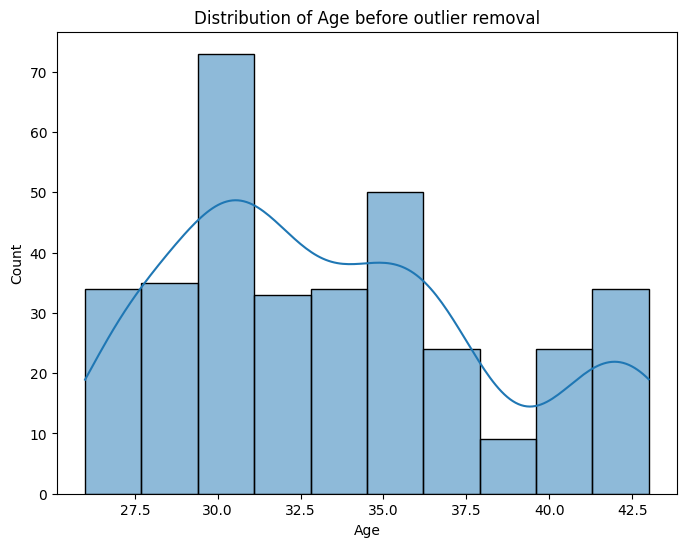

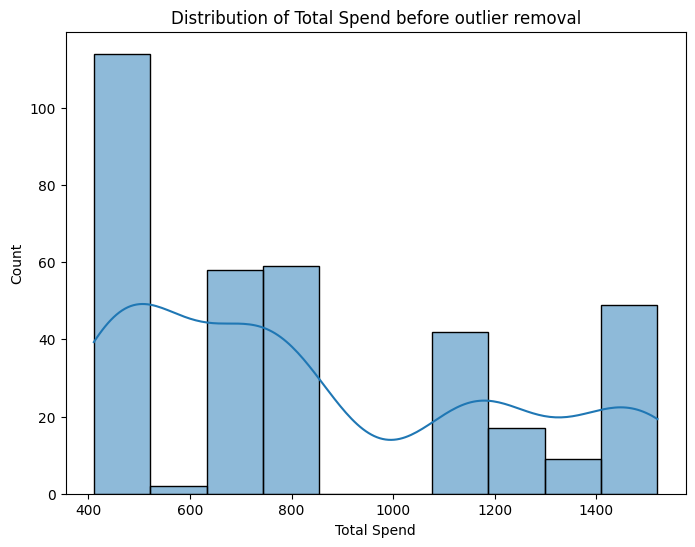

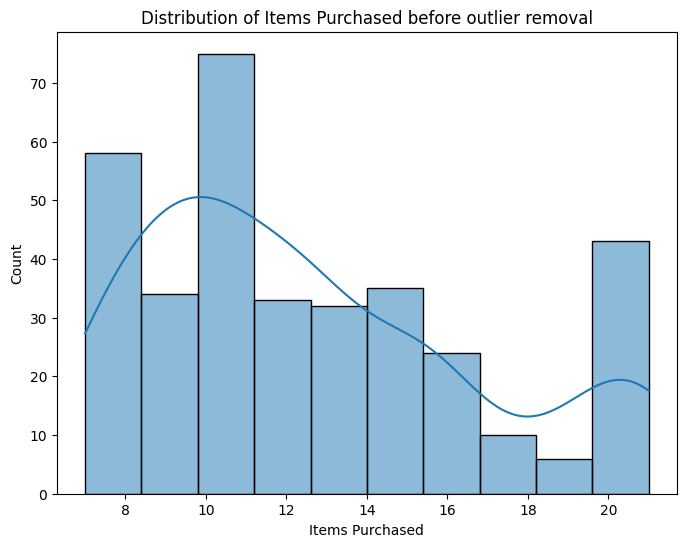

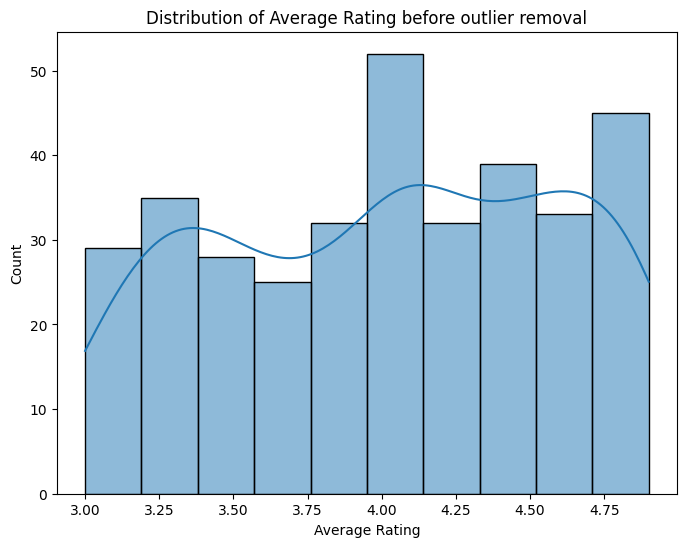

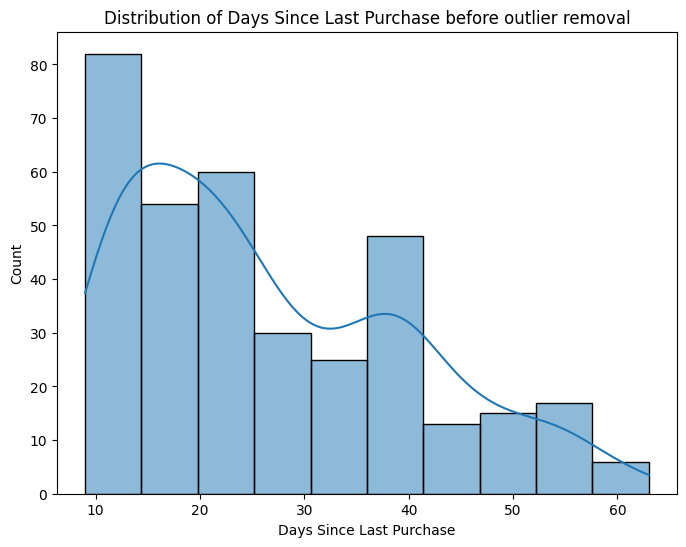

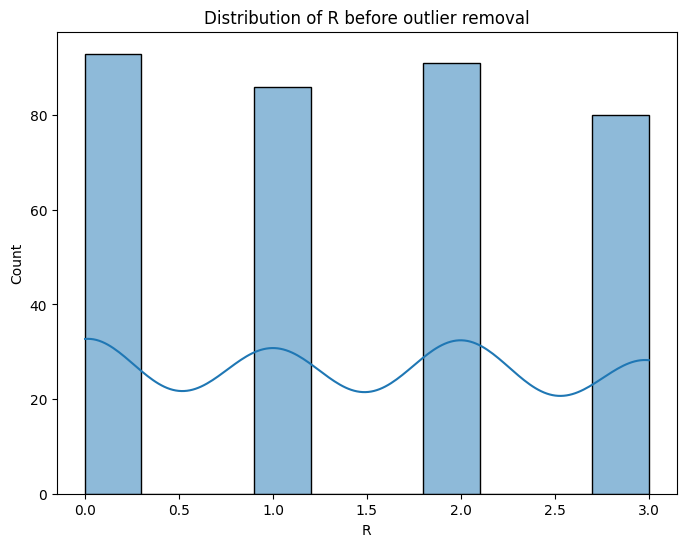

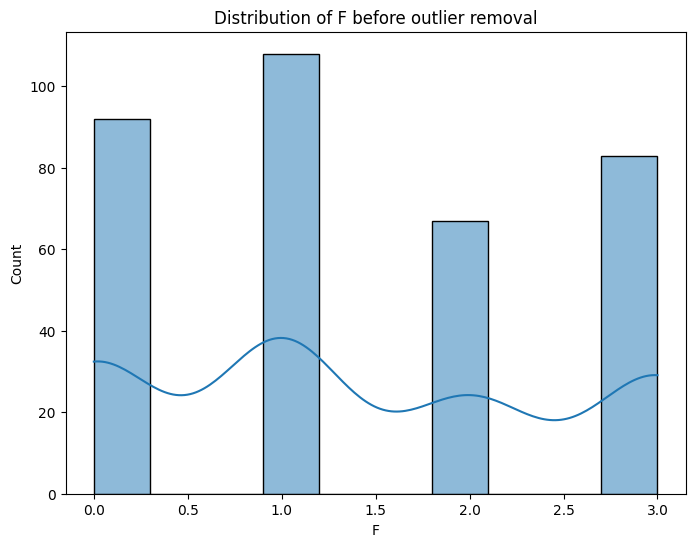

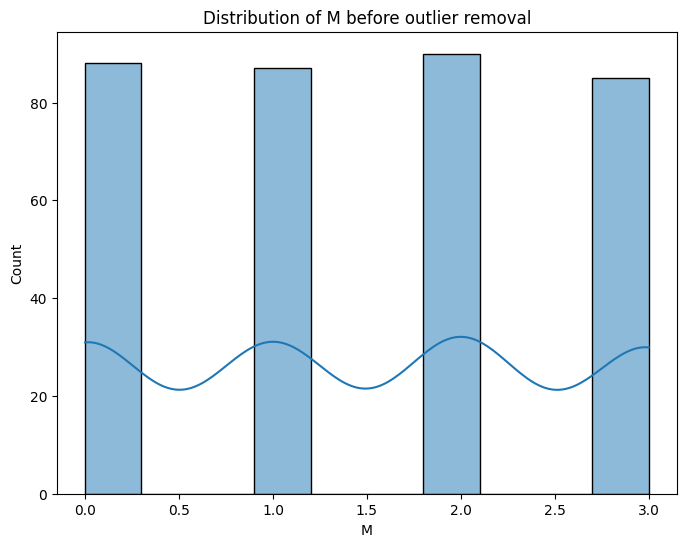

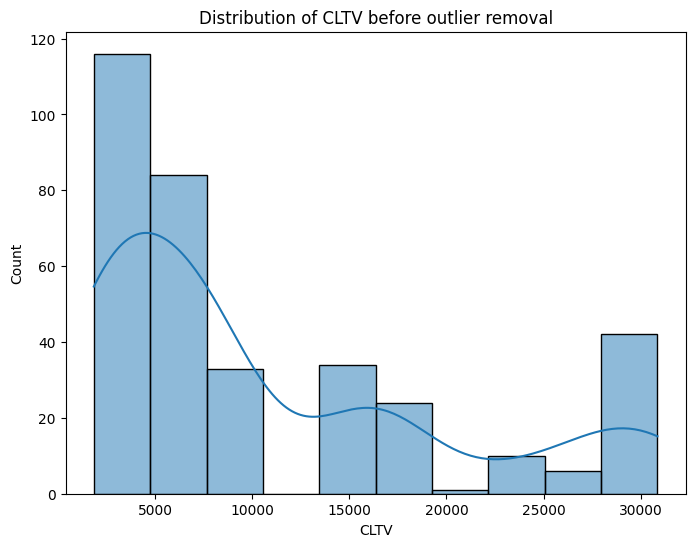

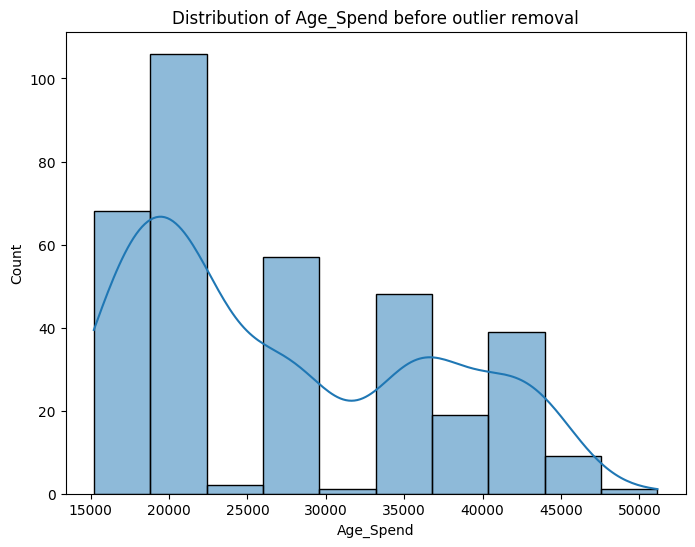

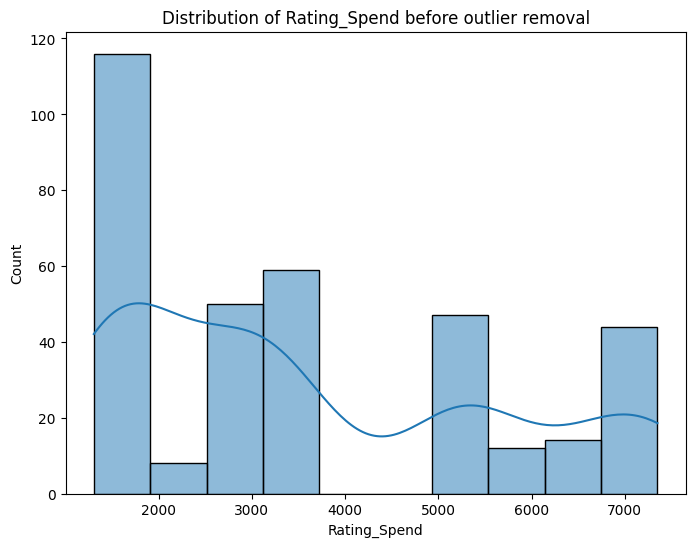

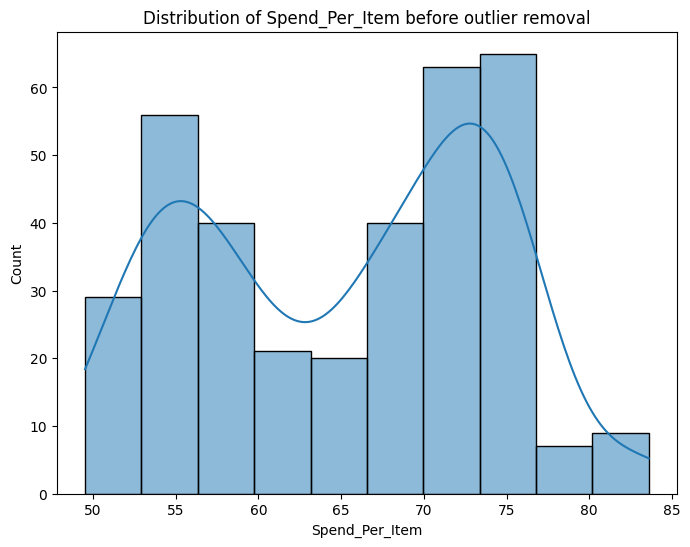

Shape before outlier removal in Age: (350, 19)
Number of outliers in Age: 0
Shape after outlier removal in Age: (350, 19)
Shape before outlier removal in Total Spend: (350, 19)
Number of outliers in Total Spend: 0
Shape after outlier removal in Total Spend: (350, 19)
Shape before outlier removal in Items Purchased: (350, 19)
Number of outliers in Items Purchased: 0
Shape after outlier removal in Items Purchased: (350, 19)
Shape before outlier removal in Average Rating: (350, 19)
Number of outliers in Average Rating: 0
Shape after outlier removal in Average Rating: (350, 19)
Shape before outlier removal in Days Since Last Purchase: (350, 19)
Number of outliers in Days Since Last Purchase: 2
Shape after outlier removal in Days Since Last Purchase: (348, 19)
Shape before outlier removal in R: (348, 19)
Number of outliers in R: 0
Shape after outlier removal in R: (348, 19)
Shape before outlier removal in F: (348, 19)
Number of outliers in F: 0
Shape after outlier removal in F: (348, 19)
Sh

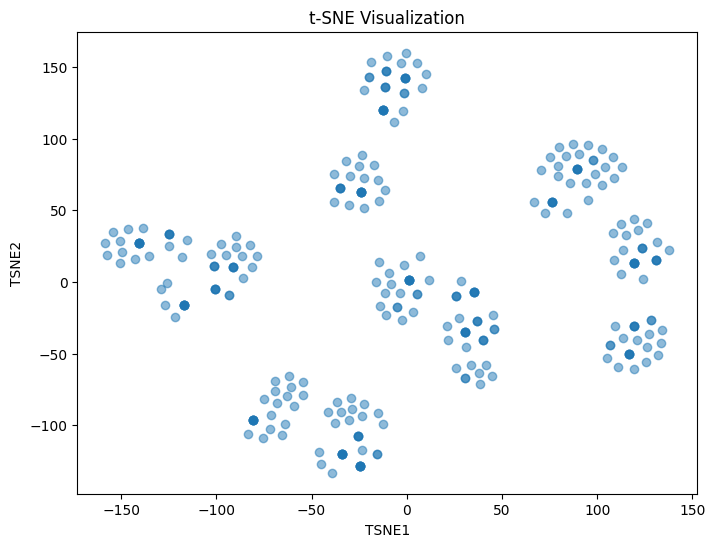

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np  # Import numpy
import seaborn as sns #Import Seaborn for advanced visualizations

# Assuming your DataFrame is named 'df'

# 1. Data Preparation and Outlier Handling: Select the features you want to use
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
            'Days Since Last Purchase', 'R', 'F', 'M', 'CLTV',
            'Age_Spend', 'Rating_Spend', 'Spend_Per_Item']  # Replace with your CORRECT feature list

# 2. Handle missing values (if any)
print("Missing values before imputation:")
print(df[features].isnull().sum())

# Impute missing values using the mean (replace with your preferred method)
for col in features:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after imputation:")
print(df[features].isnull().sum())

# 3. Outlier Detection and Handling (using IQR method)
def remove_outliers_iqr(df, column, multiplier=1.0):  # Reduced multiplier
    """Removes outliers from a DataFrame column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    num_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]  # Count outliers
    print(f"Number of outliers in {column}: {num_outliers}")  # Print outlier count
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

# Visualize distributions before outlier removal
for col in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # Use seaborn for better aesthetics
    plt.title(f"Distribution of {col} before outlier removal")
    plt.show()

# Apply outlier removal to each feature
for col in features:
    print(f"Shape before outlier removal in {col}: {df.shape}")
    df = remove_outliers_iqr(df, col)
    print(f"Shape after outlier removal in {col}: {df.shape}")

# Reset index after removing rows
df = df.reset_index(drop=True)


# 4. Scaling: Scale the data before applying PCA or t-SNE
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. PCA: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print("\nOriginal number of features:", X.shape[1])
print("Number of features after PCA:", X_pca.shape[1])

# 6. t-SNE: Apply t-SNE (optional, for visualization)
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_tsne = tsne.fit_transform(X_scaled)

print("\nNumber of features after t-SNE:", X_tsne.shape[1])

# Create DataFrames from the reduced data
pca_df = pd.DataFrame(data=X_pca)
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])  # Label columns for clarity

# Display the first few rows of the PCA and t-SNE DataFrames
print("\nPCA DataFrame:")
print(pca_df.head())

print("\nt-SNE DataFrame:")
print(tsne_df.head())

# 7. Visualize t-SNE (optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("t-SNE Visualization")
plt.show()

Missing values before imputation:
Age                         0
Total Spend                 0
Items Purchased             0
Average Rating              0
Days Since Last Purchase    0
R                           0
F                           0
M                           0
CLTV                        0
Age_Spend                   0
Rating_Spend                0
Spend_Per_Item              0
dtype: int64

Missing values after imputation:
Age                         0
Total Spend                 0
Items Purchased             0
Average Rating              0
Days Since Last Purchase    0
R                           0
F                           0
M                           0
CLTV                        0
Age_Spend                   0
Rating_Spend                0
Spend_Per_Item              0
dtype: int64


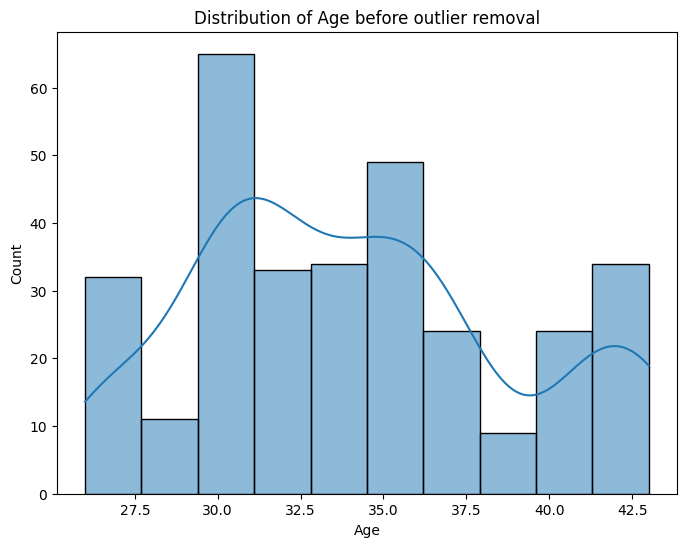

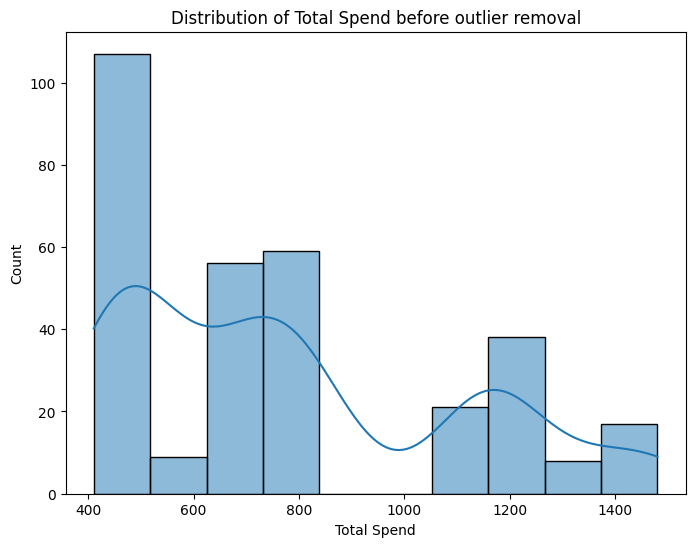

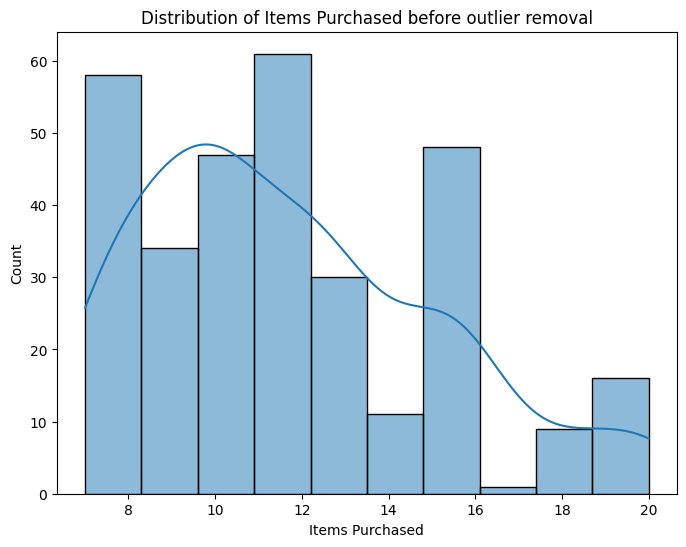

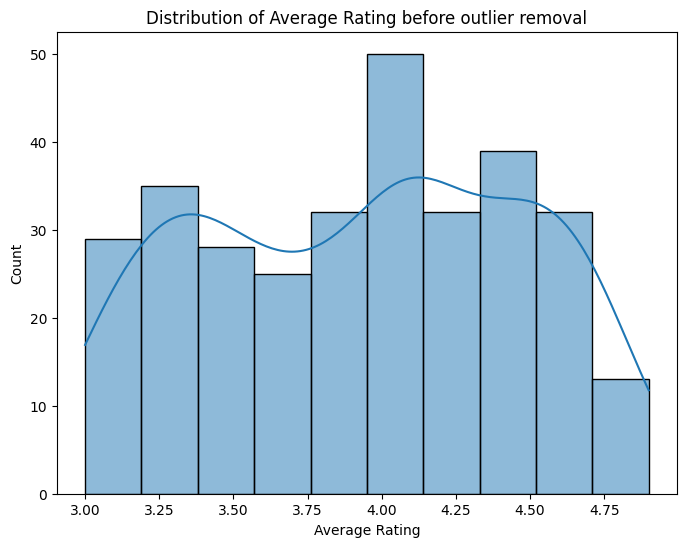

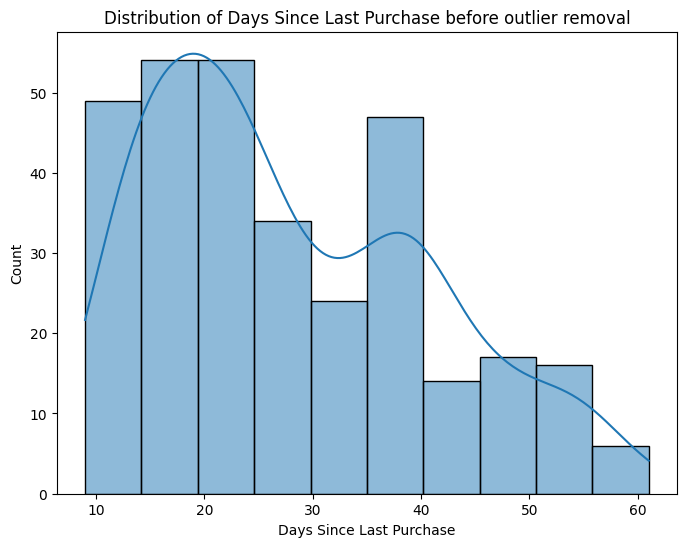

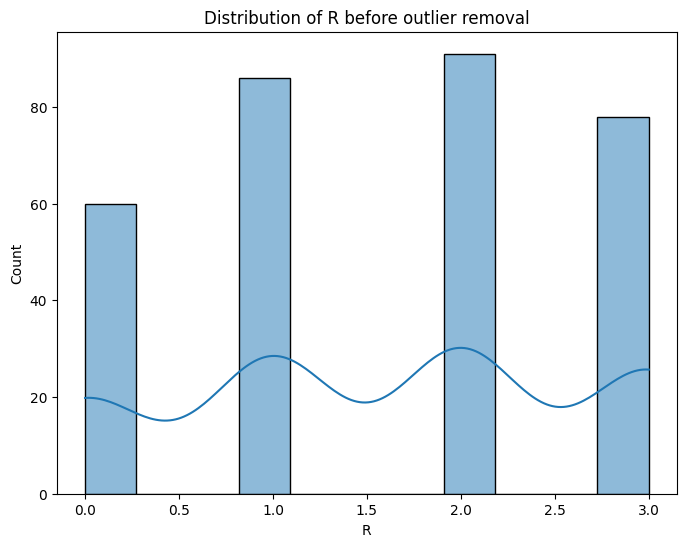

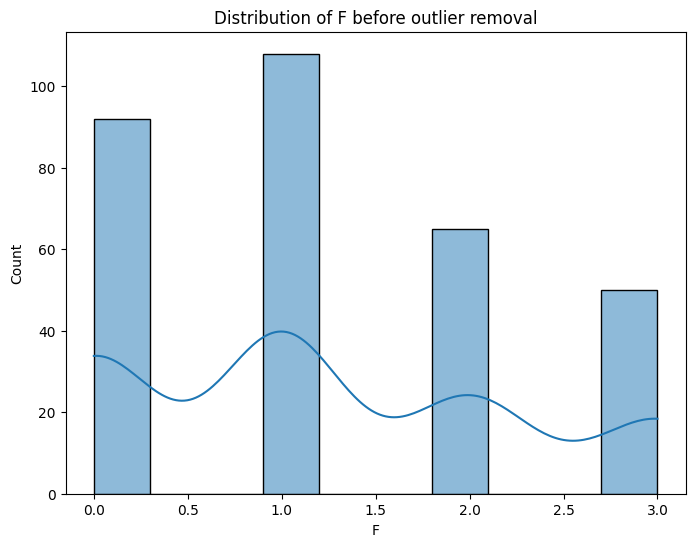

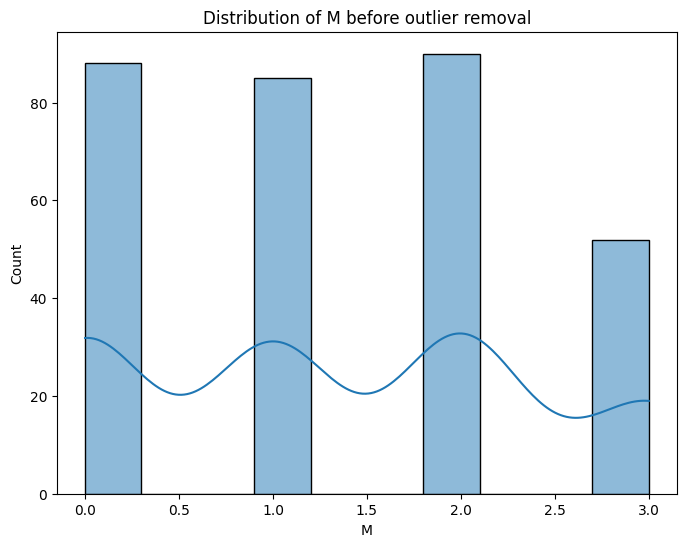

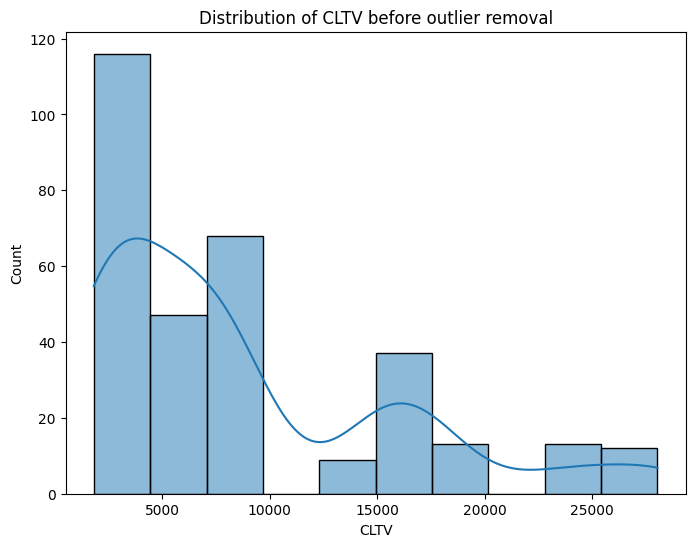

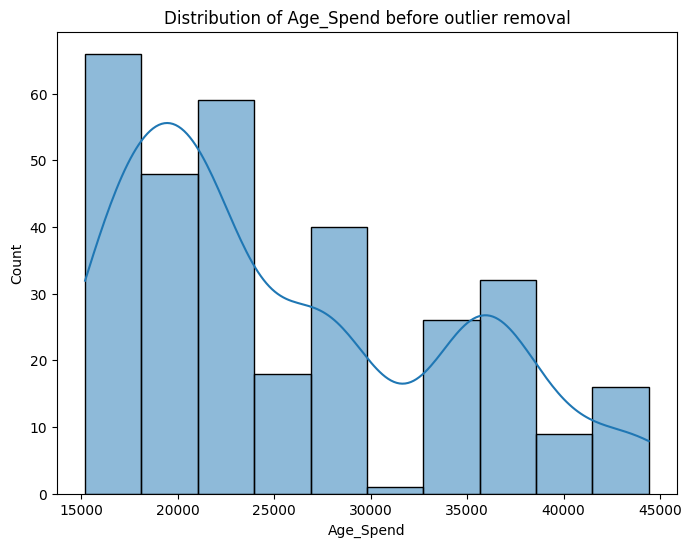

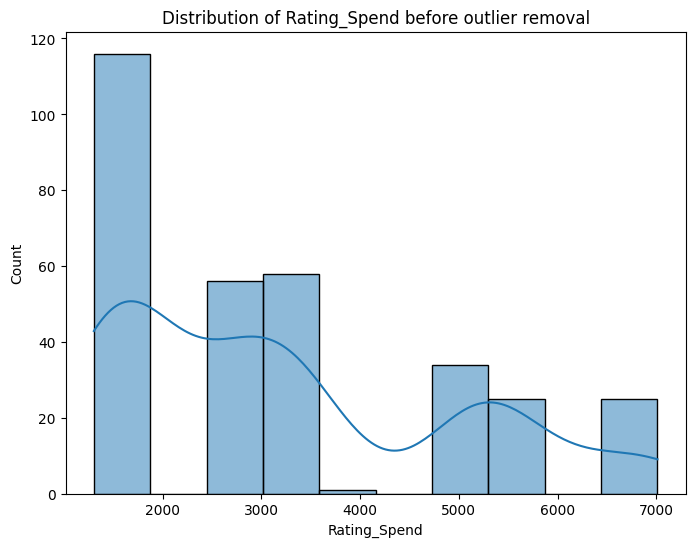

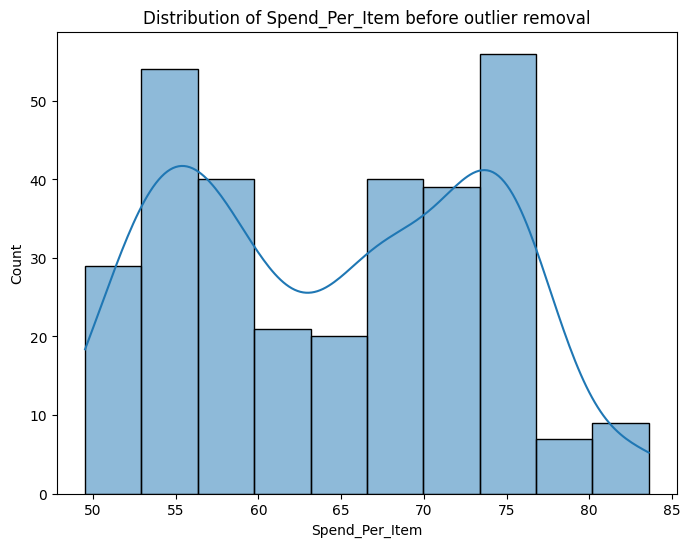

Shape before outlier removal in Age: (315, 19)
Number of outliers in Age: 0
Shape after outlier removal in Age: (315, 19)
Shape before outlier removal in Total Spend: (315, 19)
Number of outliers removed from Total Spend using z-score: 0
Shape after outlier removal in Total Spend: (315, 19)
Shape before outlier removal in Items Purchased: (315, 19)
Number of outliers in Items Purchased: 11
Shape after outlier removal in Items Purchased: (304, 19)
Shape before outlier removal in Average Rating: (304, 19)
Number of outliers in Average Rating: 0
Shape after outlier removal in Average Rating: (304, 19)
Shape before outlier removal in Days Since Last Purchase: (304, 19)
Number of outliers removed from Days Since Last Purchase using z-score: 0
Shape after outlier removal in Days Since Last Purchase: (304, 19)
Shape before outlier removal in R: (304, 19)
Number of outliers in R: 0
Shape after outlier removal in R: (304, 19)
Shape before outlier removal in F: (304, 19)
Number of outliers in F:

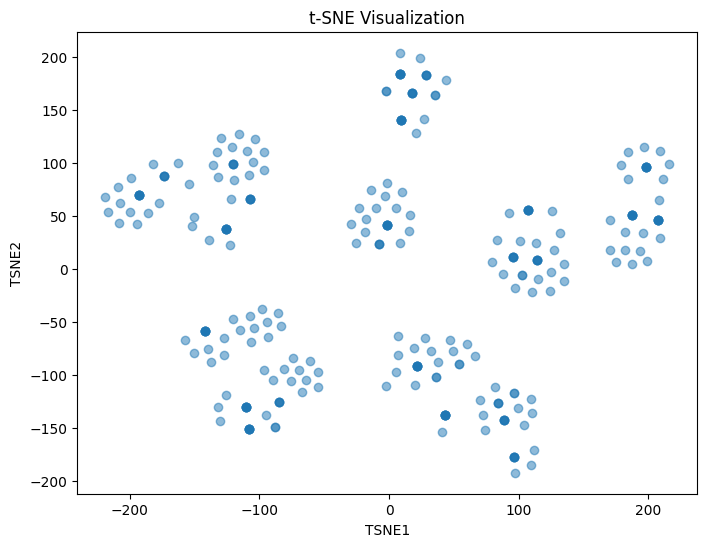

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming your DataFrame is named 'df'

# 1. Data Preparation and Outlier Handling: Select the features you want to use
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
            'Days Since Last Purchase', 'R', 'F', 'M', 'CLTV',
            'Age_Spend', 'Rating_Spend', 'Spend_Per_Item']  # Replace with your CORRECT feature list

# 2. Handle missing values (if any)
print("Missing values before imputation:")
print(df[features].isnull().sum())

# Impute missing values using the mean (replace with your preferred method)
for col in features:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after imputation:")
print(df[features].isnull().sum())

# 3. Outlier Detection and Handling

def remove_outliers_iqr(df, column, multiplier=1.0):
    """Removes outliers from a DataFrame column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    num_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]  # Count outliers
    print(f"Number of outliers in {column}: {num_outliers}")  # Print outlier count
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

def winsorize_and_remove_outliers(df, column, lower_percentile=0.05, upper_percentile=0.95, z_threshold=3):
    """Winsorizes a column and then removes outliers based on Z-score."""
    #Winsorize
    lower_value = df[column].quantile(lower_percentile)
    upper_value = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower_value, upper_value)

    #Calculate Z-scores
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())

    #Identify and remove outliers
    num_outliers = df[z_scores > z_threshold].shape[0]
    print(f"Number of outliers removed from {column} using z-score: {num_outliers}")
    df_no_outliers = df[z_scores < z_threshold]
    return df_no_outliers

# Visualize distributions before outlier removal
for col in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # Use seaborn for better aesthetics
    plt.title(f"Distribution of {col} before outlier removal")
    plt.show()

# Apply outlier removal to each feature
skewed_columns = ['Total Spend', 'CLTV', 'Age_Spend', 'Rating_Spend', 'Days Since Last Purchase']  # Columns for Winsorization + Z-score

for col in features:
    print(f"Shape before outlier removal in {col}: {df.shape}")
    if col in skewed_columns:
        df = winsorize_and_remove_outliers(df, col)
    else:
        df = remove_outliers_iqr(df, col)
    print(f"Shape after outlier removal in {col}: {df.shape}")

# Reset index after removing rows
df = df.reset_index(drop=True)

# 4. Scaling: Scale the data before applying PCA or t-SNE
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. PCA: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print("\nOriginal number of features:", X.shape[1])
print("Number of features after PCA:", X_pca.shape[1])

# 6. t-SNE: Apply t-SNE (optional, for visualization)
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_tsne = tsne.fit_transform(X_scaled)

print("\nNumber of features after t-SNE:", X_tsne.shape[1])

# Create DataFrames from the reduced data
pca_df = pd.DataFrame(data=X_pca)
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])  # Label columns for clarity

# Display the first few rows of the PCA and t-SNE DataFrames
print("\nPCA DataFrame:")
print(pca_df.head())

print("\nt-SNE DataFrame:")
print(tsne_df.head())

# 7. Visualize t-SNE (optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("t-SNE Visualization")
plt.show()

Missing values before imputation:
Age                         0
Total Spend                 0
Items Purchased             0
Average Rating              0
Days Since Last Purchase    0
R                           0
F                           0
M                           0
CLTV                        0
Age_Spend                   0
Rating_Spend                0
Spend_Per_Item              0
dtype: int64

Missing values after imputation:
Age                         0
Total Spend                 0
Items Purchased             0
Average Rating              0
Days Since Last Purchase    0
R                           0
F                           0
M                           0
CLTV                        0
Age_Spend                   0
Rating_Spend                0
Spend_Per_Item              0
dtype: int64


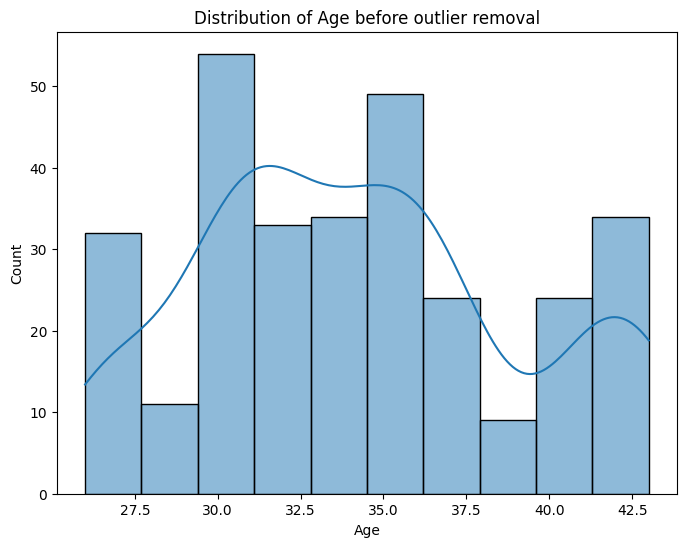

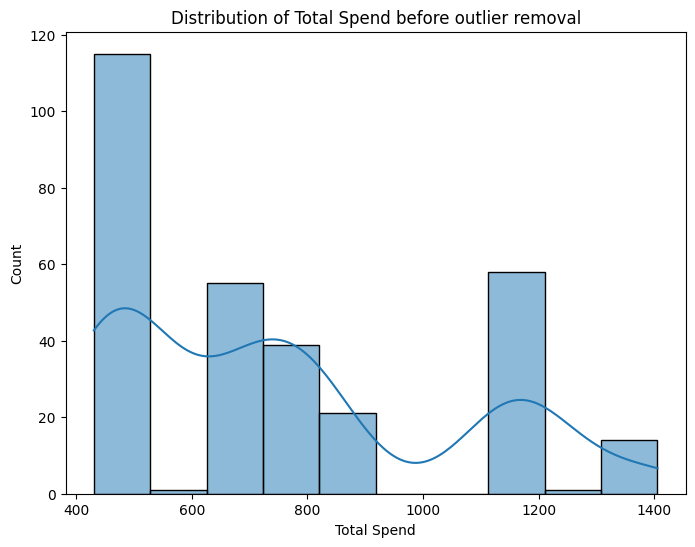

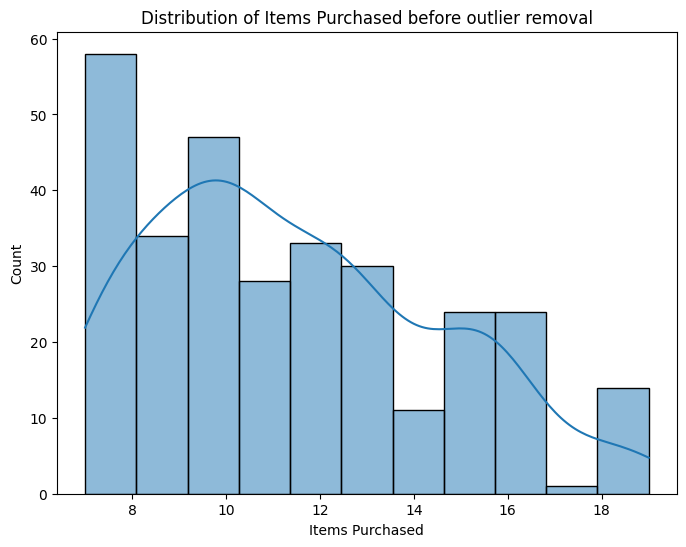

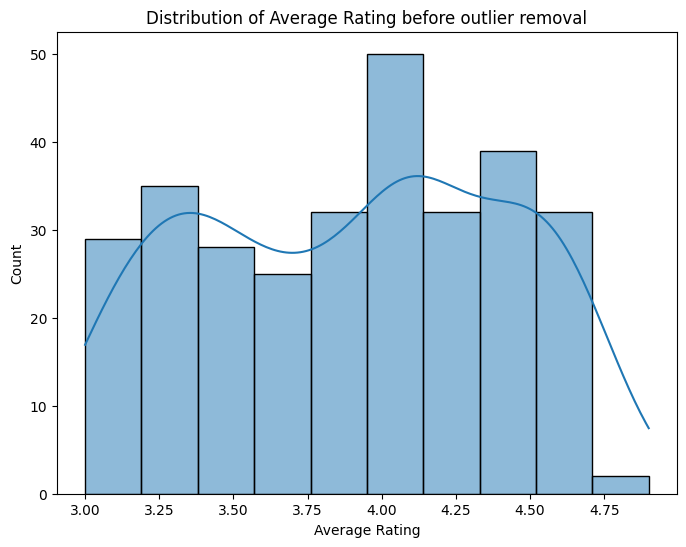

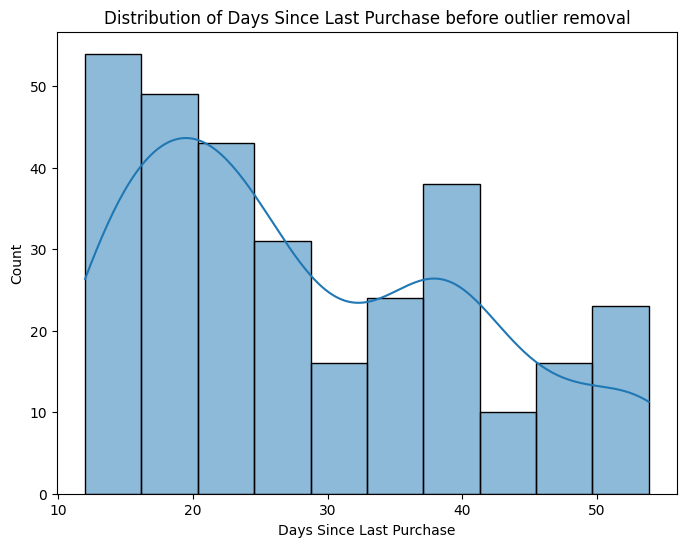

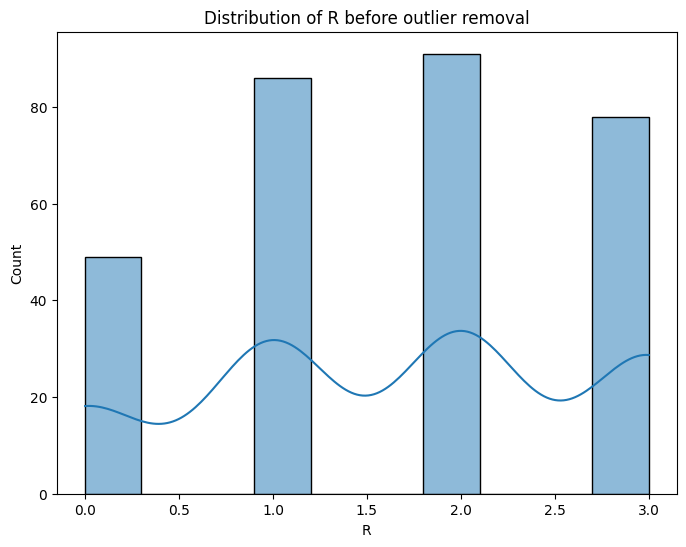

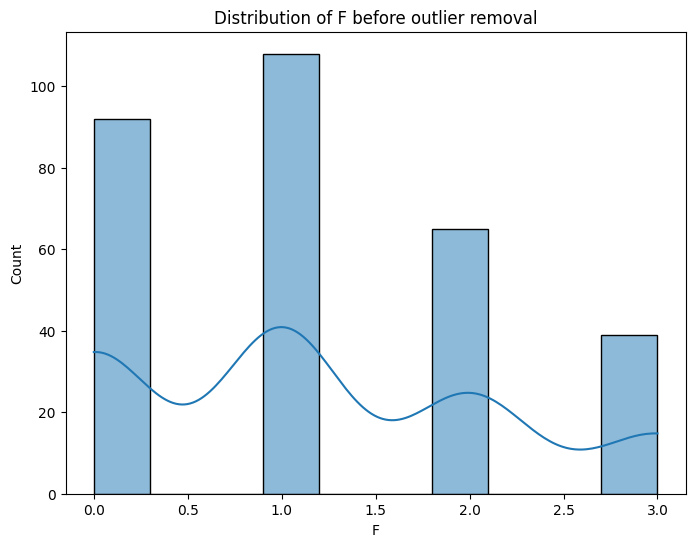

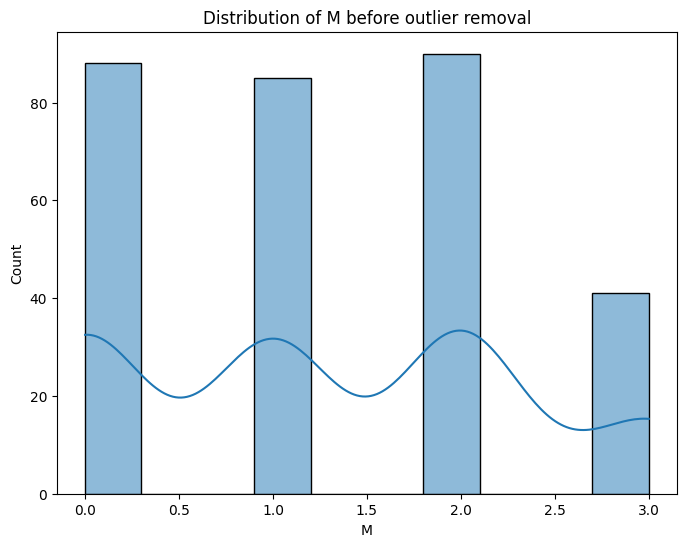

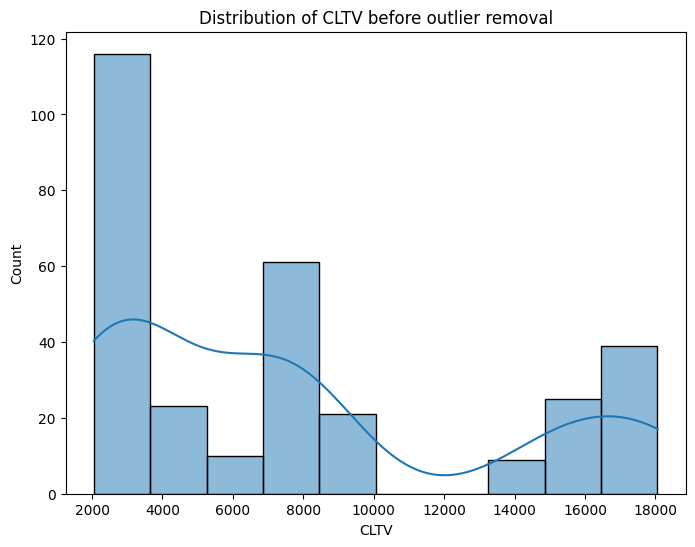

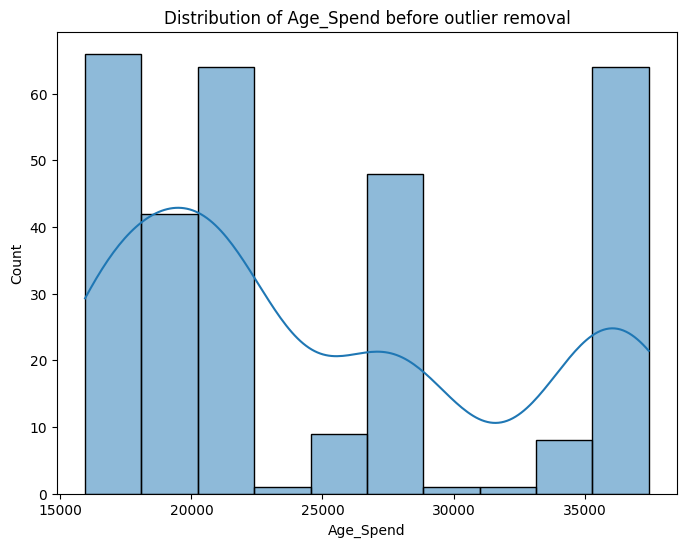

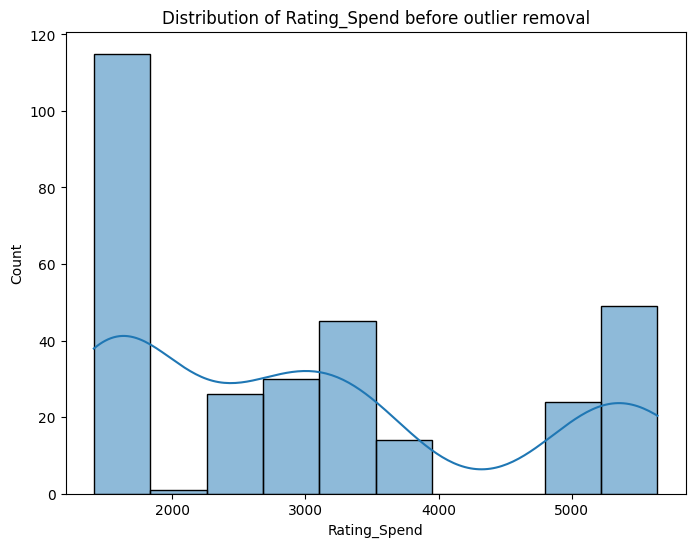

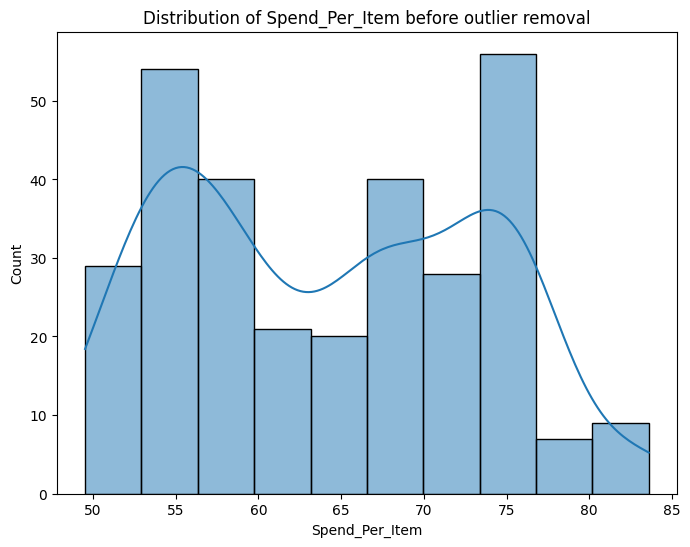

Shape before outlier removal in Age: (304, 19)
Number of outliers in Age: 0
Shape after outlier removal in Age: (304, 19)
Shape before outlier removal in Total Spend: (304, 19)


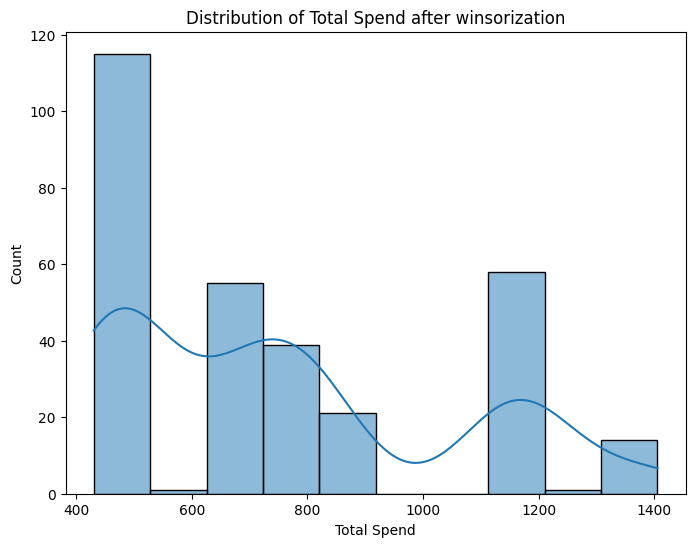

Z-scores for Total Spend: count    304.000000
mean       0.823707
std        0.565038
min        0.055984
25%        0.231857
50%        0.897785
75%        1.121355
max        2.259037
Name: Total Spend, dtype: float64
Number of outliers removed from Total Spend using z-score: 0
Shape after outlier removal in Total Spend: (304, 19)
Shape before outlier removal in Items Purchased: (304, 19)
Number of outliers in Items Purchased: 14
Shape after outlier removal in Items Purchased: (290, 19)
Shape before outlier removal in Average Rating: (290, 19)
Number of outliers in Average Rating: 0
Shape after outlier removal in Average Rating: (290, 19)
Shape before outlier removal in Days Since Last Purchase: (290, 19)


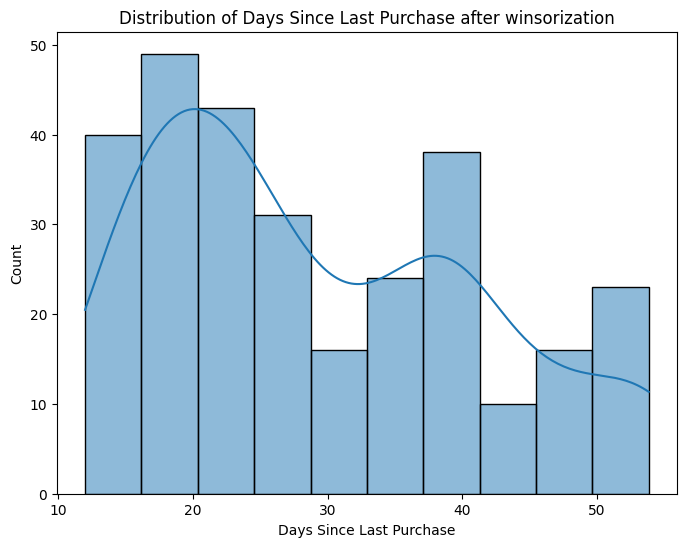

Z-scores for Days Since Last Purchase: count    290.000000
mean       0.863322
std        0.502092
min        0.026040
25%        0.520688
50%        0.798373
75%        1.180219
max        2.022627
Name: Days Since Last Purchase, dtype: float64
Number of outliers removed from Days Since Last Purchase using z-score: 0
Shape after outlier removal in Days Since Last Purchase: (290, 19)
Shape before outlier removal in R: (290, 19)
Number of outliers in R: 0
Shape after outlier removal in R: (290, 19)
Shape before outlier removal in F: (290, 19)
Number of outliers in F: 0
Shape after outlier removal in F: (290, 19)
Shape before outlier removal in M: (290, 19)
Number of outliers in M: 0
Shape after outlier removal in M: (290, 19)
Shape before outlier removal in CLTV: (290, 19)


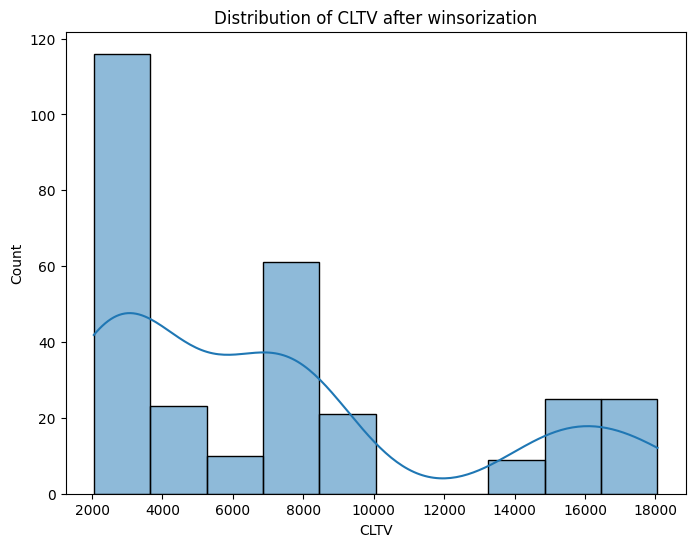

Z-scores for CLTV: count    290.000000
mean       0.791187
std        0.609801
min        0.003080
25%        0.252971
50%        0.774818
75%        1.017836
max        2.150617
Name: CLTV, dtype: float64
Number of outliers removed from CLTV using z-score: 0
Shape after outlier removal in CLTV: (290, 19)
Shape before outlier removal in Age_Spend: (290, 19)


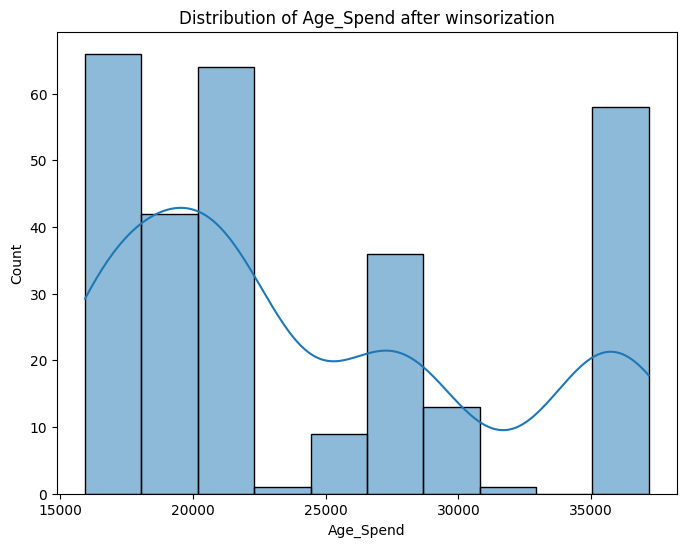

Z-scores for Age_Spend: count    290.000000
mean       0.872177
std        0.486493
min        0.172913
25%        0.431147
50%        0.726595
75%        1.194136
max        1.867580
Name: Age_Spend, dtype: float64
Number of outliers removed from Age_Spend using z-score: 0
Shape after outlier removal in Age_Spend: (290, 19)
Shape before outlier removal in Rating_Spend: (290, 19)


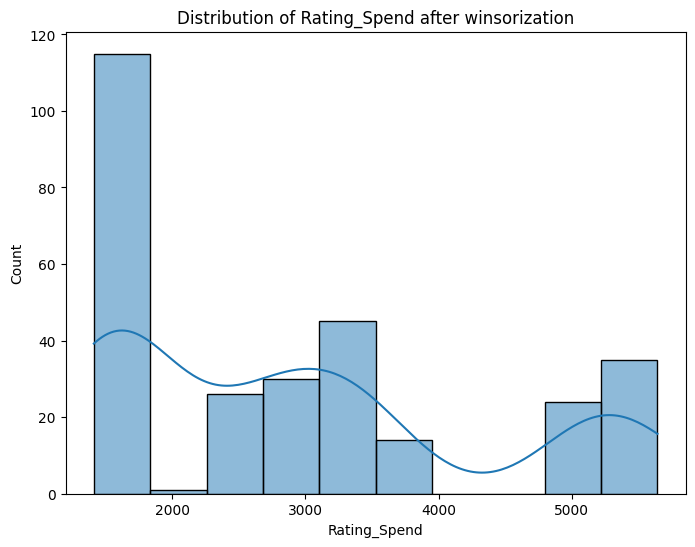

Z-scores for Rating_Spend: count    290.000000
mean       0.824178
std        0.564252
min        0.002676
25%        0.265041
50%        0.852394
75%        1.080676
max        1.957789
Name: Rating_Spend, dtype: float64
Number of outliers removed from Rating_Spend using z-score: 0
Shape after outlier removal in Rating_Spend: (290, 19)
Shape before outlier removal in Spend_Per_Item: (290, 19)
Number of outliers in Spend_Per_Item: 0
Shape after outlier removal in Spend_Per_Item: (290, 19)

Original number of features: 12
Number of features after PCA: 4

Number of features after t-SNE: 2

PCA DataFrame:
          0         1         2         3
0  4.075183  0.376530 -0.157944  1.113267
1  1.070419 -1.270428 -0.122078  0.088488
2 -2.780061  0.703597  1.589117  0.323500
3  0.026553  3.072432 -1.192376 -0.439356
4 -3.253341 -1.337877 -0.523273 -0.367305

t-SNE DataFrame:
        TSNE1       TSNE2
0  213.555435  -37.791412
1   28.489113  -79.525574
2 -151.902008   98.573364
3    8.684481  1

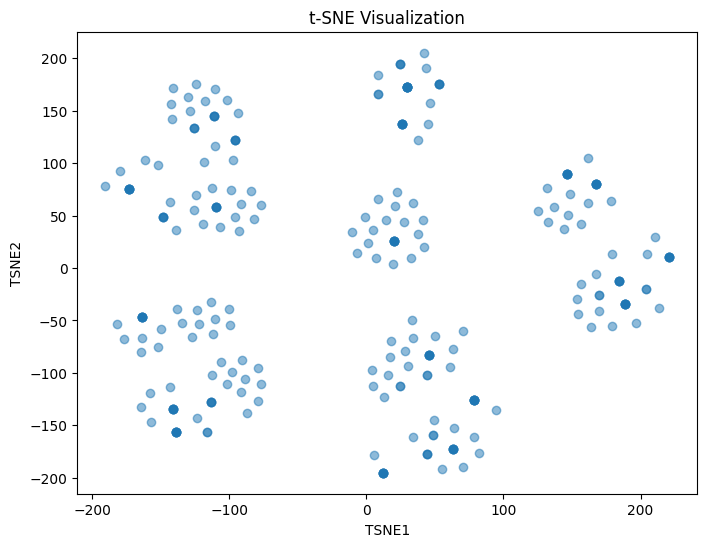

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming your DataFrame is named 'df'

# 1. Data Preparation and Outlier Handling: Select the features you want to use
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating',
            'Days Since Last Purchase', 'R', 'F', 'M', 'CLTV',
            'Age_Spend', 'Rating_Spend', 'Spend_Per_Item']  # Replace with your CORRECT feature list

# 2. Handle missing values (if any)
print("Missing values before imputation:")
print(df[features].isnull().sum())

# Impute missing values using the mean (replace with your preferred method)
for col in features:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after imputation:")
print(df[features].isnull().sum())

# 3. Outlier Detection and Handling

def remove_outliers_iqr(df, column, multiplier=1.0):
    """Removes outliers from a DataFrame column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    num_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]  # Count outliers
    print(f"Number of outliers in {column}: {num_outliers}")  # Print outlier count
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

def winsorize_and_remove_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99, z_threshold=2.5): # Less aggressive winsorization, lower z_threshold
    """Winsorizes a column and then removes outliers based on Z-score."""
    #Winsorize
    lower_value = df[column].quantile(lower_percentile)
    upper_value = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower_value, upper_value)

    #Inspect Winsorized Distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column} after winsorization")
    plt.show()

    #Calculate Z-scores
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    print(f"Z-scores for {column}: {z_scores.describe()}") #Print Z-score summary

    #Identify and remove outliers
    num_outliers = df[z_scores > z_threshold].shape[0]
    print(f"Number of outliers removed from {column} using z-score: {num_outliers}")
    df_no_outliers = df[z_scores < z_threshold]
    return df_no_outliers

# Visualize distributions before outlier removal
for col in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # Use seaborn for better aesthetics
    plt.title(f"Distribution of {col} before outlier removal")
    plt.show()

# Apply outlier removal to each feature
skewed_columns = ['Total Spend', 'CLTV', 'Age_Spend', 'Rating_Spend', 'Days Since Last Purchase']  # Columns for Winsorization + Z-score

for col in features:
    print(f"Shape before outlier removal in {col}: {df.shape}")
    if col in skewed_columns:
        df = winsorize_and_remove_outliers(df, col)
    else:
        df = remove_outliers_iqr(df, col)
    print(f"Shape after outlier removal in {col}: {df.shape}")

# Reset index after removing rows
df = df.reset_index(drop=True)

# 4. Scaling: Scale the data before applying PCA or t-SNE
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. PCA: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print("\nOriginal number of features:", X.shape[1])
print("Number of features after PCA:", X_pca.shape[1])

# 6. t-SNE: Apply t-SNE (optional, for visualization)
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_tsne = tsne.fit_transform(X_scaled)

print("\nNumber of features after t-SNE:", X_tsne.shape[1])

# Create DataFrames from the reduced data
pca_df = pd.DataFrame(data=X_pca)
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])  # Label columns for clarity

# Display the first few rows of the PCA and t-SNE DataFrames
print("\nPCA DataFrame:")
print(pca_df.head())

print("\nt-SNE DataFrame:")
print(tsne_df.head())

# 7. Visualize t-SNE (optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("t-SNE Visualization")
plt.show()

DataFrame columns: Index(['Age', 'Total Spend', 'Items Purchased', 'Average Rating'], dtype='object')
Missing values before imputation:
Age                0
Total Spend        0
Items Purchased    0
Average Rating     0
dtype: int64

Missing values after imputation:
Age                0
Total Spend        0
Items Purchased    0
Average Rating     0
dtype: int64


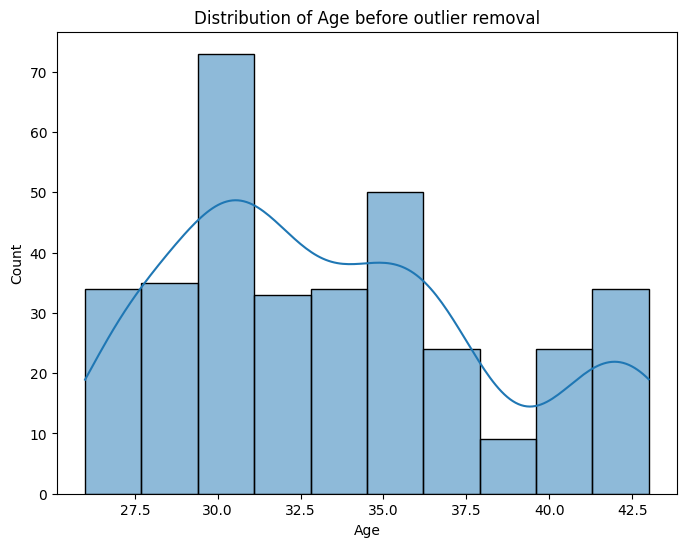

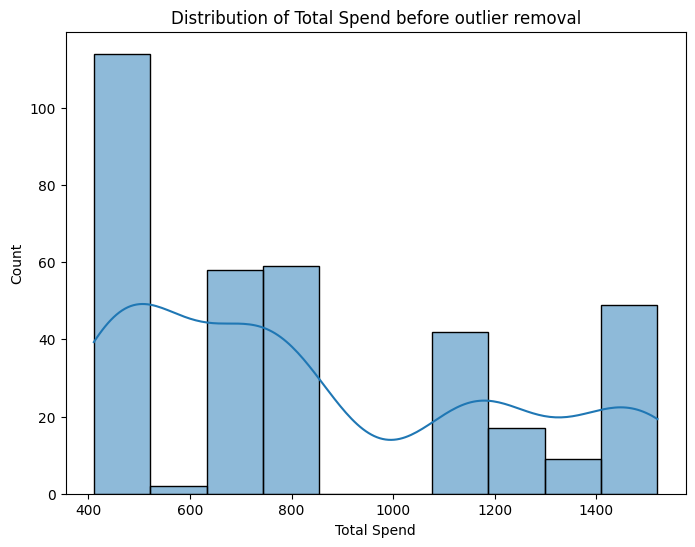

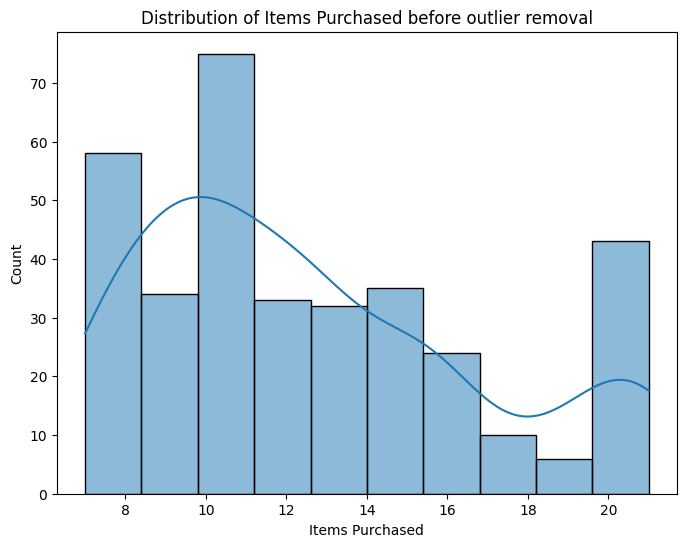

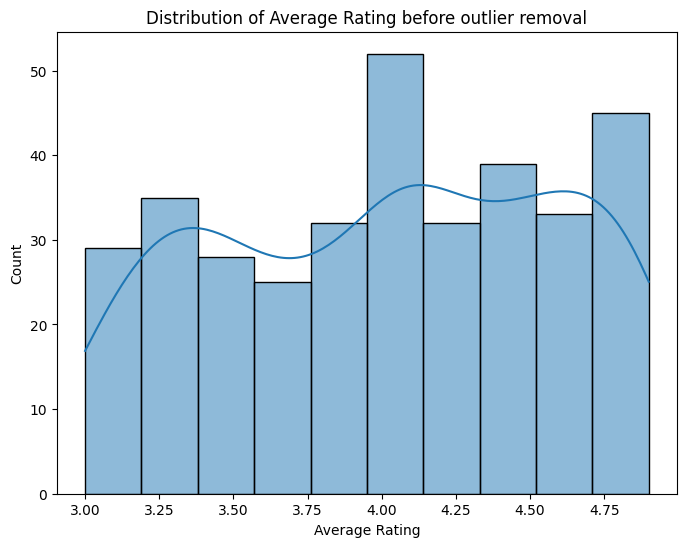

Shape before outlier removal in Age: (350, 4)
Number of outliers in Age: 0
Shape after outlier removal in Age: (350, 4)
Shape before outlier removal in Total Spend: (350, 4)


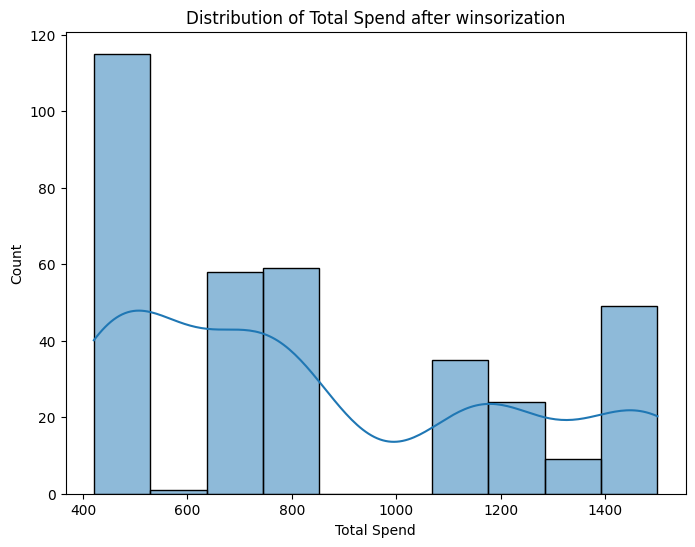

Z-scores for Total Spend: count    350.000000
mean       0.860137
std        0.507980
min        0.039935
25%        0.427590
50%        0.932597
75%        1.117523
max        1.809095
Name: Total Spend, dtype: float64
Number of outliers removed from Total Spend using z-score: 0
Shape after outlier removal in Total Spend: (350, 4)
Shape before outlier removal in Items Purchased: (350, 4)
Number of outliers in Items Purchased: 0
Shape after outlier removal in Items Purchased: (350, 4)
Shape before outlier removal in Average Rating: (350, 4)
Number of outliers in Average Rating: 0
Shape after outlier removal in Average Rating: (350, 4)

Original number of features: 4
Number of features after PCA: 2

Number of features after t-SNE: 2

PCA DataFrame:
          0         1
0  1.503718 -0.354180
1 -0.257216 -0.068765
2 -2.330983  1.024808
3  2.646676  0.507166
4  0.446000 -1.296642

t-SNE DataFrame:
        TSNE1       TSNE2
0  134.131531  -46.699284
1   14.963443  -89.731270
2  -94.084351 

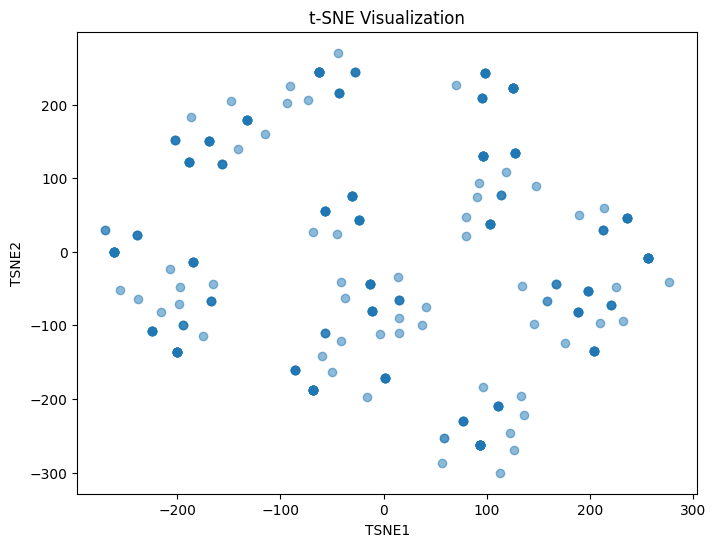

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Assuming your DataFrame is named 'df'

# Print the column names to diagnose the KeyError
print("DataFrame columns:", df.columns)

# 1. Data Preparation and Outlier Handling: Select the features you want to use
# Replace this with the CORRECT feature list based on the output of df.columns
features = ['Age', 'Total Spend', 'Items Purchased', 'Average Rating']

# 2. Handle missing values (if any)
print("Missing values before imputation:")
print(df[features].isnull().sum())

# Impute missing values using the mean (replace with your preferred method)
for col in features:
    if df[col].isnull().any():
        df[col].fillna(df[col].mean(), inplace=True)

print("\nMissing values after imputation:")
print(df[features].isnull().sum())

# 3. Outlier Detection and Handling

def remove_outliers_iqr(df, column, multiplier=1.0):
    """Removes outliers from a DataFrame column using the IQR method."""
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    num_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]  # Count outliers
    print(f"Number of outliers in {column}: {num_outliers}")  # Print outlier count
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_no_outliers

def winsorize_and_remove_outliers(df, column, lower_percentile=0.01, upper_percentile=0.99, z_threshold=2.5): # Less aggressive winsorization, lower z_threshold
    """Winsorizes a column and then removes outliers based on Z-score."""
    #Winsorize
    lower_value = df[column].quantile(lower_percentile)
    upper_value = df[column].quantile(upper_percentile)
    df[column] = df[column].clip(lower_value, upper_value)

    #Inspect Winsorized Distribution
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column} after winsorization")
    plt.show()

    #Calculate Z-scores
    z_scores = np.abs((df[column] - df[column].mean()) / df[column].std())
    print(f"Z-scores for {column}: {z_scores.describe()}") #Print Z-score summary

    #Identify and remove outliers
    num_outliers = df[z_scores > z_threshold].shape[0]
    print(f"Number of outliers removed from {column} using z-score: {num_outliers}")
    df_no_outliers = df[z_scores < z_threshold]
    return df_no_outliers

# Visualize distributions before outlier removal
for col in features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # Use seaborn for better aesthetics
    plt.title(f"Distribution of {col} before outlier removal")
    plt.show()

# Apply outlier removal to each feature
skewed_columns = ['Total Spend']  # Columns for Winsorization + Z-score

for col in features:
    print(f"Shape before outlier removal in {col}: {df.shape}")
    if col in skewed_columns:
        df = winsorize_and_remove_outliers(df, col)
    else:
        df = remove_outliers_iqr(df, col)
    print(f"Shape after outlier removal in {col}: {df.shape}")

# Reset index after removing rows
df = df.reset_index(drop=True)

# 4. Scaling: Scale the data before applying PCA or t-SNE
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. PCA: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

print("\nOriginal number of features:", X.shape[1])
print("Number of features after PCA:", X_pca.shape[1])

# 6. t-SNE: Apply t-SNE (optional, for visualization)
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions for visualization
X_tsne = tsne.fit_transform(X_scaled)

print("\nNumber of features after t-SNE:", X_tsne.shape[1])

# Create DataFrames from the reduced data
pca_df = pd.DataFrame(data=X_pca)
tsne_df = pd.DataFrame(data=X_tsne, columns=['TSNE1', 'TSNE2'])  # Label columns for clarity

# Display the first few rows of the PCA and t-SNE DataFrames
print("\nPCA DataFrame:")
print(pca_df.head())

print("\nt-SNE DataFrame:")
print(tsne_df.head())

# 7. Visualize t-SNE (optional)
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.xlabel("TSNE1")
plt.ylabel("TSNE2")
plt.title("t-SNE Visualization")
plt.show()

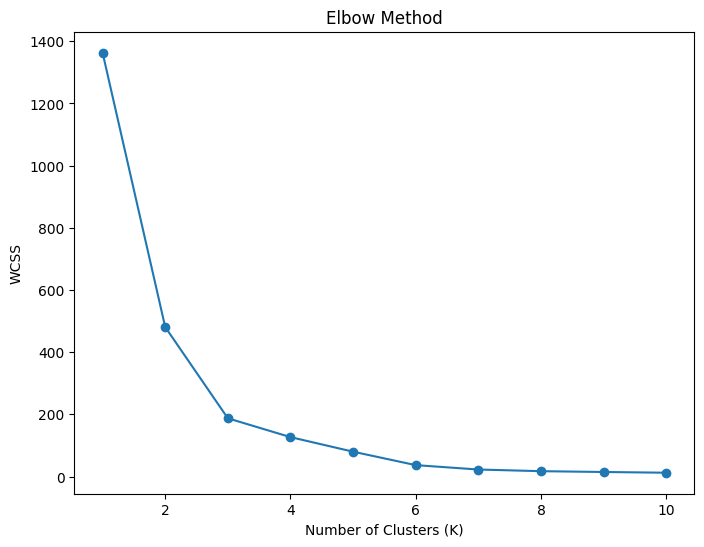

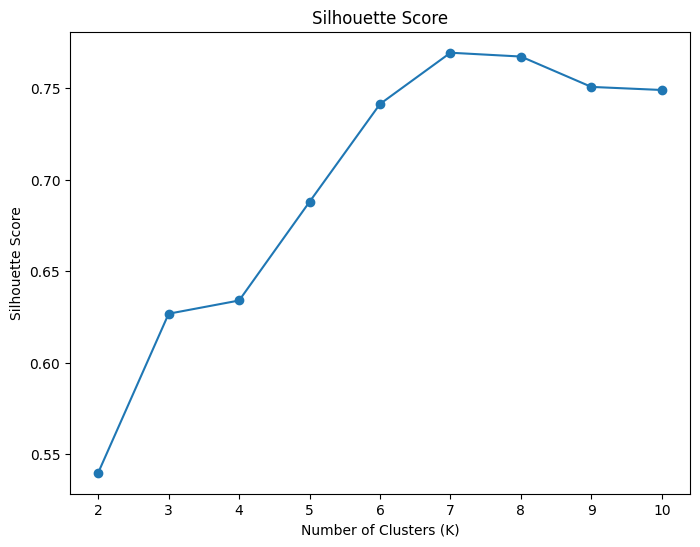

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 1. Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  # Added n_init
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# 2. Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)  # Added n_init
    kmeans.fit(pca_df)
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(pca_df, labels))

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Train K-Means with K = 3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(pca_df)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original DataFrame
df['Cluster'] = cluster_labels

# Display the cluster distribution
print(df['Cluster'].value_counts())

# Display the first few rows with cluster assignments
print(df.head())

Cluster
1    117
2    117
0    116
Name: count, dtype: int64
   Age  Total Spend  Items Purchased  Average Rating  Cluster
0   29      1120.20               14             4.6        1
1   34       780.50               11             4.1        2
2   43       510.75                9             3.4        0
3   30      1480.30               19             4.7        1
4   27       720.40               13             4.0        2


In [ ]:
# Calculate the mean values of the original features for each cluster
cluster_profiles = df.groupby('Cluster')[['Age', 'Total Spend', 'Items Purchased', 'Average Rating']].mean()

# Print the cluster profiles
print(cluster_profiles)

               Age  Total Spend  Items Purchased  Average Rating
Cluster                                                         
0        39.362069   473.475000         8.491379        3.325000
1        29.923077  1310.973504        17.615385        4.675214
2        31.555556   748.432479        11.658120        4.051282


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# Define churn based on Average Rating
df['Churn'] = np.where(df['Average Rating'] < 3.5, 1, 0)

# Display the churn distribution
print(df['Churn'].value_counts())

# Prepare data for churn prediction
X = df[['Age', 'Total Spend', 'Items Purchased', 'Cluster']]  # Use cluster assignments as a feature
y = df['Churn']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Churn
0    267
1     83
Name: count, dtype: int64
Shape of X_train: (245, 4)
Shape of X_test: (105, 4)
Shape of y_train: (245,)
Shape of y_test: (105,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC
auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
print(f"AUC: {auc:.4f}")

Accuracy: 0.9143
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94        77
           1       0.85      0.82      0.84        28

    accuracy                           0.91       105
   macro avg       0.89      0.88      0.89       105
weighted avg       0.91      0.91      0.91       105

AUC: 0.9907


In [ ]:
# Get the coefficients from the Logistic Regression model
coefficients = logreg.coef_[0]

# Create a DataFrame to display the feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(coefficients)})
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Print the feature importances
print(feature_importances)

           Feature  Importance
3          Cluster    0.420469
2  Items Purchased    0.288419
0              Age    0.103687
1      Total Spend    0.034584


In [ ]:
# Calculate the churn rate for each cluster
cluster_churn_rate = df.groupby('Cluster')['Churn'].mean()

# Print the churn rate for each cluster
print(cluster_churn_rate)

Cluster
0    0.715517
1    0.000000
2    0.000000
Name: Churn, dtype: float64


In [ ]:
# Calculate the mean values of the features for each cluster
cluster_means = df.groupby('Cluster').mean()

# Print the mean values for each cluster
print(cluster_means)

               Age  Total Spend  Items Purchased  Average Rating     Churn
Cluster                                                                   
0        39.362069   473.475000         8.491379        3.325000  0.715517
1        29.923077  1310.973504        17.615385        4.675214  0.000000
2        31.555556   748.432479        11.658120        4.051282  0.000000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Print the results
print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Classification Report:\n", report_rf)
print("Random Forest AUC:", auc_rf)

Random Forest Accuracy: 1.0
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        77
           1       1.00      1.00      1.00        28

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

Random Forest AUC: 1.0
